In [1]:
import pandas as pd
import cv2
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [15]:
# Defining a data augmentation process
transform = A.Compose([
    # A.Rotate(limit=360, p=0.5),  # Rotate up to 360 degrees w/ probability of 50%
    A.RandomBrightnessContrast(brightness_limit=[-0.4, 0.4], contrast_limit=[-0.4, 0.4], p=0.5),  # Adjust brightness & contrast w/ probability of 50%
    A.HorizontalFlip(p=0.5),  # Flip image horizontally w/ probability of 50%
    A.GaussianBlur(p=0.3),  # Add blur/noise w/ probability of 30%
])

In [11]:
folder_path_spot = "Original Dataset/Black Spot"
folder_path_mildew = "Original Dataset/Downy Mildew"
folder_path_leaf = "Original Dataset/Fresh Leaf"

# Dictionary for reading in all images across all folders
images_folder_mappings = {
    "Black Spot": [],
    "Downy Mildew": [],
    "Fresh Leaf": []
}

# Loop through the folder and read all images
for folder in [folder_path_spot, folder_path_mildew, folder_path_leaf]:
    images_in_folder = []
    for filename in os.listdir(folder):
        # Check if the file is an image (optional filter by extension)
        if filename.endswith((".jpg")):
            # Construct the full path to the image
            img_path = os.path.join(folder, filename)
            
            # Read the image
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
            
            # Append the image to the list
            images_in_folder.append(image)
    
    # Add the read in images to the dictionary, at the key corresponding to the folder read from
    if folder == folder_path_spot:
        images_folder_mappings["Black Spot"] = images_in_folder
    elif folder == folder_path_mildew:
        images_folder_mappings["Downy Mildew"] = images_in_folder
    else:
        images_folder_mappings["Fresh Leaf"] = images_in_folder


In [12]:
print(f"Spot images: {len(images_folder_mappings["Black Spot"])}") # Should be 313
print(f"Mildew images: {len(images_folder_mappings["Downy Mildew"])}") # Should be 200
print(f"Healthy Leaf images: {len(images_folder_mappings["Fresh Leaf"])}") # Should be 404

Spot images: 313
Mildew images: 200
Healthy Leaf images: 404


In [13]:
# Creating output folders
output_folder_main = "Augmented Dataset"
output_folder_spot = "Augmented Dataset/Black Spot"
output_folder_mildew = "Augmented Dataset/Downy Mildew"
output_folder_leaf = "Augmented Dataset/Fresh Leaf"

for folder in [output_folder_main, output_folder_mildew, output_folder_leaf, output_folder_spot]:
    os.makedirs(folder, exist_ok=True)  # Create folder if it doesn't exist

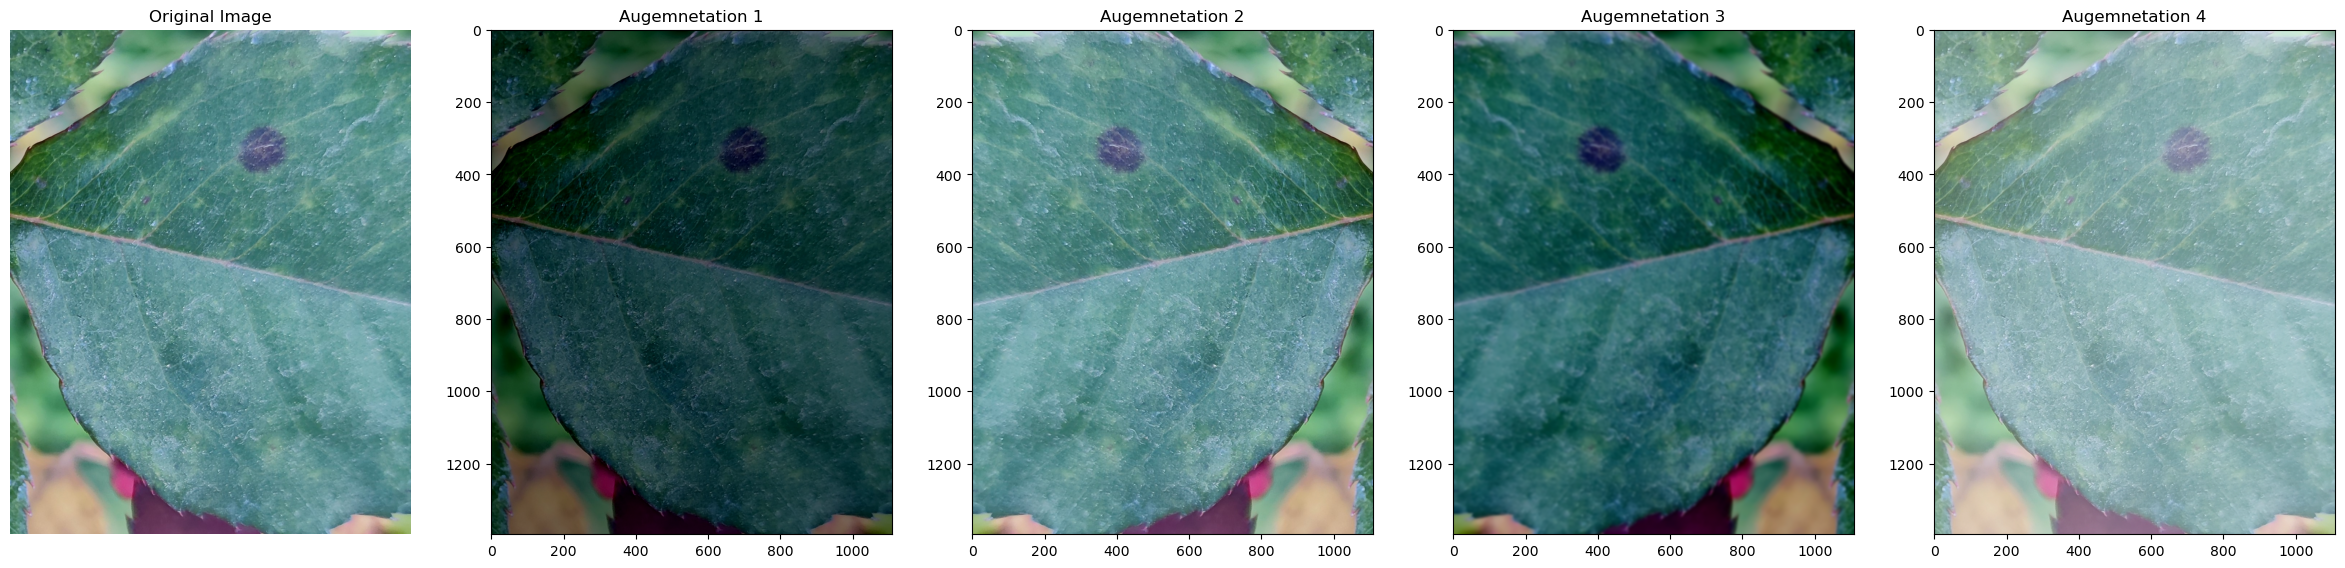

In [16]:
test_flag = True

# Iterating, transforming and saving every image
for folder, images_in_folder in images_folder_mappings.items():

    # Image Saving Things - Setting the output folder for the images based on dict key
    output_folder = ""
    if folder == "Black Spot":
        output_folder = output_folder_spot
    elif folder == "Downy Mildew":
        output_folder = output_folder_mildew
    else:
        output_folder = output_folder_leaf

    # Iterate images in each folder
    for i in range(0, len(images_in_folder)):
        # For display purposes
        augmented_images = []

        # augment the image 4 times
        for j in range(1, 5):
            # Augmentation transformation
            augmented = transform(image=images_in_folder[i])["image"]
            augmented_image = Image.fromarray(augmented)

            augmented_images.append(augmented_image) # For display
            
            # Save the main image to the output folder
            output_path = os.path.join(output_folder, f"{folder} ({i})-{j}.jpg") # Format: Classification (image number)-augmentation_num
            augmented_image.save(output_path)
        
        # Save the main, original image with j = 0
        output_path = os.path.join(output_folder, f"{folder} ({i})-{0}.jpg")
        original_image = Image.fromarray(images_in_folder[i])
        original_image.save(output_path)

        if test_flag:
            plt.figure(figsize=(30,15))

            plt.subplot(1,5,1)
            plt.imshow(images_in_folder[i])
            plt.title('Original Image')
            plt.axis("off")

            plt.subplot(1,5,2)
            plt.imshow(augmented_images[0])
            plt.title('Augemnetation 1')

            plt.subplot(1,5,3)
            plt.imshow(augmented_images[1])
            plt.title('Augemnetation 2')

            plt.subplot(1,5,4)
            plt.imshow(augmented_images[2])
            plt.title('Augemnetation 3')

            plt.subplot(1,5,5)
            plt.imshow(augmented_images[3])
            plt.title('Augemnetation 4')

            plt.show()
        
        test_flag = False